<a href="https://colab.research.google.com/github/ardra1111/Sentiment-Analysis-of-IMDb-Movie-Reviews/blob/main/Text_Preprocessing_and_TF_IDF_Vectorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Text Preprocessing and TF-IDF Vectorization for Sentiment Analysis**

#**LOADING THE DATA**

In [1]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2024-06-16 16:23:17--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz.1’

aclImdb_v1.tar.gz.1 100%[===================>]  80.23M  14.1MB/s    in 15s     

2024-06-16 16:23:32 (5.29 MB/s) - ‘aclImdb_v1.tar.gz.1’ saved [84125825/84125825]




This line of code uses `wget` to download the IMDB dataset for sentiment analysis from the specified URL (`http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz`). `wget` is a command-line utility for downloading files from the web.

In [2]:
!tar xvzf aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

This line extracts the contents of the downloaded `aclImdb_v1.tar.gz` file using the `tar xvzf` command. `tar` is a command-line utility for handling tar archives, and the options `xvzf` instruct it to extract (`x`), be verbose (`v`), filter through gzip (`z`), and read from a file (`f`).

#**DATA PREPROCESSING**

In [3]:
import os

def fetch_reviews(path):
  data = []
  #path = 'aclImdb/train/pos/'
  files = [f for f in os.listdir(path)]
  for file in files:
    with open(path+file, "r", encoding='utf8') as f:
      data.append(f.read())

  return data

- `import os`: Imports the Python module `os`, which provides a way of interacting with the operating system.
- `fetch_reviews(path)`: Defines a function `fetch_reviews` that takes a `path` parameter representing the directory path containing the review files.
- `data = []`: Initializes an empty list to store the contents of the review files.
- `files = [f for f in os.listdir(path)]`: Uses `os.listdir(path)` to list all files in the specified directory (`path`).
- `for file in files:`: Iterates through each file in `files`.
- `with open(path+file, "r", encoding='utf8') as f:`: Opens each file in read mode (`"r"`), specifying UTF-8 encoding (`encoding='utf8'`), and assigns it to `f`.
- `data.append(f.read())`: Reads the contents of the file (`f.read()`) and appends it to the `data` list.
- `return data`: Returns the list `data` containing all the reviews read from the files in the specified directory.

In [4]:
import pandas as pd

df_train_pos = pd.DataFrame({'review': fetch_reviews('aclImdb/train/pos/'), 'label': 1})
df_train_neg = pd.DataFrame({'review': fetch_reviews('aclImdb/train/neg/'), 'label': 0})

df_test_pos = pd.DataFrame({'review': fetch_reviews('aclImdb/test/pos/'), 'label': 1})
df_test_neg = pd.DataFrame({'review': fetch_reviews('aclImdb/test/neg/'), 'label': 0})

# Merging all df's for data cleaning and preprocessing step.
df = pd.concat([df_train_pos, df_train_neg, df_test_pos, df_test_neg], ignore_index=True)
print("Total reviews in df: ", df.shape)
df.head()

Total reviews in df:  (50000, 2)


,review,label
0,"Luckily, not knowing anything about this movie...",1
1,This is a beautiful movie that is wonderfully ...,1
2,This movie is so misunderstood it is not even ...,1
3,One of the best documentaries released in rece...,1
4,I have just recently been through a stage wher...,1


- `import pandas as pd`: Imports the Pandas library, which provides data structures and data analysis tools for Python.
- `df_train_pos = pd.DataFrame({'review': fetch_reviews('aclImdb/train/pos/'), 'label': 1})`: Creates a Pandas DataFrame `df_train_pos` containing positive reviews (`'label': 1`) fetched using the `fetch_reviews` function from the `aclImdb/train/pos/` directory.
- `df_train_neg = pd.DataFrame({'review': fetch_reviews('aclImdb/train/neg/'), 'label': 0})`: Creates a Pandas DataFrame `df_train_neg` containing negative reviews (`'label': 0`) fetched using the `fetch_reviews` function from the `aclImdb/train/neg/` directory.
- `df_test_pos = pd.DataFrame({'review': fetch_reviews('aclImdb/test/pos/'), 'label': 1})`: Creates a Pandas DataFrame `df_test_pos` containing positive reviews (`'label': 1`) fetched using the `fetch_reviews` function from the `aclImdb/test/pos/` directory.
- `df_test_neg = pd.DataFrame({'review': fetch_reviews('aclImdb/test/neg/'), 'label': 0})`: Creates a Pandas DataFrame `df_test_neg` containing negative reviews (`'label': 0`) fetched using the `fetch_reviews` function from the `aclImdb/test/neg/` directory.
- `df = pd.concat([df_train_pos, df_train_neg, df_test_pos, df_test_neg], ignore_index=True)`: Concatenates all four DataFrames (`df_train_pos`, `df_train_neg`, `df_test_pos`, `df_test_neg`) into a single DataFrame `df`, ignoring the original indices (`ignore_index=True`).
- `print("Total reviews in df: ", df.shape)`: Prints the total number of reviews in the concatenated DataFrame `df`.
- `df.head()`: Displays the first few rows of the DataFrame `df`.

In [5]:
# No null values in dataset.
df['review'].isnull().sum()

0

In [6]:
print("Total Number of positive reviews in data: ", df[df['label']==1].shape[0])
print("Total Number of negative reviews in data: ", df[df['label']==0].shape[0])

Total Number of positive reviews in data:  25000
Total Number of negative reviews in data:  25000


In [7]:
# sample positive movie review
df[df['label']==1].sample(n=1)['review'].iloc[0]

'Sydney Lumet, although one of the oldest active directors, still got game! A few years ago he shot "Find me guilty", a proof to everyone that Vin Diesel can actually act, if he gets the opportunity and the right director. If he had retired after this movie (a true masterpiece in my eyes), no one could have blamed him. But he\'s still going strong, his next movie already announced for 2009.<br /><br />But let\'s stay with this movie right here. The cast list is incredible, their performance top notch. The little nuances in their performances, the "real" dialogue and/or situations that evolve throughout the movie are just amazing. The (time) structure of the movie, that keeps your toes the whole time, blending time-lines so seamlessly, that the editing seems natural/flawless. The story is heightened by that, although even in a "normal" time structure, it would\'ve been at least a good movie (Drama/Thriller). I can only highly recommend it, the rest is up to you! :o)'

In [8]:
# sample negative review
df[df['label']==0].sample(n=1)['review'].iloc[0]

"Bad. Bad. Bad. Those three lines sum up this crappy little film that can only attract idiot children and their parents to the cinema. and its... #1 Movie in America! What is this country thinking? Mike Myers looking more like Micheal Jackson. Some Chineese lady that falls asleep within 3 minutes. A lame plot with dirty jokes. It's grotesuque and awful. When Green-Eggs and Ham comes out in 2005 I'll be so happy! (not) Eddie Murphy and Tracy Morgan will probably play two hipsters trying to find the lost Green-Eggs and Ham. They'll try to chase Sam-I-Am and that mean guy who are running away with it. (I hope they don't ruin the classic book.) Don't waste time and money by seeing this."

In [9]:
# word_count in reviews
word_counts = df['review'].apply(lambda x: len(x.split()))

word_counts.describe()

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review, dtype: float64

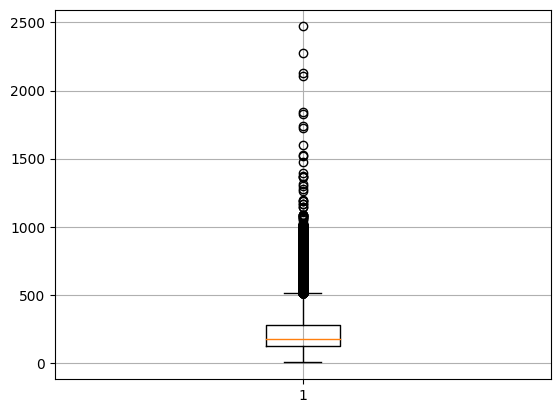

In [16]:
# word_count in reviews
df['word_count'] = df['review'].apply(lambda x: len(x.split()))  # Add word counts as a column to df

word_counts.describe()

plt.boxplot(df['word_count'].values)
plt.grid(True)
plt.show()

In [22]:
import re
import nltk
nltk.download('stopwords')  # Download the stopwords corpus
nltk.download('punkt') # Download the punkt sentence tokenizer
nltk.download('wordnet') # Download the wordnet corpus for lemmatization
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english') # defining stop_words
stop_words.remove('not') # removing not from the stop_words list as it contains value in negative movies
lemmatizer = WordNetLemmatizer()

def data_preprocessing(review):

  # data cleaning
  review = re.sub(re.compile('<.*?>'), '', review) #removing html tags
  review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words

  # lowercase
  review = review.lower()

  # tokenization
  tokens = nltk.word_tokenize(review) # converts review to tokens

  # stop_words removal
  review = [word for word in tokens if word not in stop_words] #removing stop words

  # lemmatization
  review = [lemmatizer.lemmatize(word) for word in review]

  # join words in preprocessed review
  review = ' '.join(review)

  return review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


- `import re`: Imports the regular expression module for text processing.
- `from nltk.corpus import stopwords`: Imports stopwords from the NLTK (Natural Language Toolkit) corpus, which are common words that do not contribute much to the meaning of a sentence.
- `from nltk.tokenize import word_tokenize`: Imports the `word_tokenize` function from NLTK, which tokenizes (splits into words) a string.
- `from nltk.stem import WordNetLemmatizer`: Imports the `WordNetLemmatizer` class from NLTK, used for lemmatization.
- `stop_words = stopwords.words('english')`: Retrieves the list of English stopwords from NLTK.
- `stop_words.remove('not')`: Removes the word 'not' from the list of stopwords, as it is crucial for sentiment analysis.
- `lemmatizer = WordNetLemmatizer()`: Creates an instance of `WordNetLemmatizer` for lemmatization.
- `def data_preprocessing(review):`: Defines a function `data_preprocessing` that preprocesses a given `review`.
- `review = re.sub(re.compile('<.*?>'), '', review)`: Uses regular expressions (`re.sub`) to remove HTML tags (`<.*?>`) from the review.
- `review = re.sub('[^A-Za-z0-9]+', ' ', review)`: Uses regular expressions to keep only alphanumeric characters and replace others with a space.
- `review = review.lower()`: Converts the review to lowercase.
- `tokens = nltk.word_tokenize(review)`: Tokenizes the review into words.
- `review = [word for word in tokens if word not in stop_words]`: Removes stopwords from the tokenized review.
- `review = [lemmatizer.lemmatize(word) for word in review]`: Lemmatizes each word in the review.
- `review = ' '.join(review)`: Joins the lemmatized words back into a single string and returns the preprocessed review.

In [23]:
df['preprocessed_review'] = df['review'].apply(lambda review: data_preprocessing(review))
df.head()

,review,label,word_count,preprocessed_review
0,"Luckily, not knowing anything about this movie...",1,253,luckily not knowing anything movie curious eno...
1,This is a beautiful movie that is wonderfully ...,1,141,beautiful movie wonderfully acted player make ...
2,This movie is so misunderstood it is not even ...,1,126,movie misunderstood not even funny think seein...
3,One of the best documentaries released in rece...,1,508,one best documentary released recent year poin...
4,I have just recently been through a stage wher...,1,974,recently stage wanted see horror film 90 hold ...


#**WORD CLOUD OF POSITIVE REVIEWS**

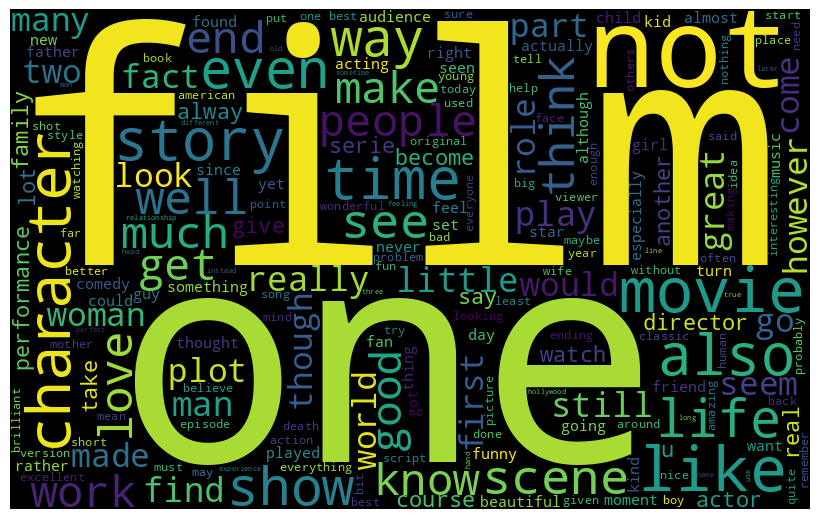

In [24]:
from wordcloud import WordCloud

words_list = df[df['label']==1]['preprocessed_review'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

- `from wordcloud import WordCloud`: Imports the `WordCloud` class from the `wordcloud` library for generating word clouds.
- `words_list = df[df['label']==1]['preprocessed_review'].unique().tolist()`: Retrieves unique preprocessed reviews (`'preprocessed_review'`) from positive sentiment reviews (`df['label']==1`).
- `pos_words = " ".join(words_list)`: Joins the unique preprocessed reviews into a single string `pos_words` separated by spaces.
- `pos_wordcloud = WordCloud(width=800, height=500, stopwords=stop_words).generate(pos_words)`: Creates a `WordCloud` object `pos_wordcloud` with specified width, height, and stopwords, and generates the word cloud from `pos_words`.
- `plt.figure(figsize=(8, 8), facecolor=None)`: Creates a matplotlib figure with specified size (`figsize=(8, 8)`) and facecolor.
- `plt.imshow(pos_wordcloud)`: Displays the word cloud generated from `pos_wordcloud`.
- `plt.axis("off")`: Turns off the axis for the plot.
- `plt.tight_layout(pad=0)`: Adjusts subplot parameters for a tight layout with no padding.


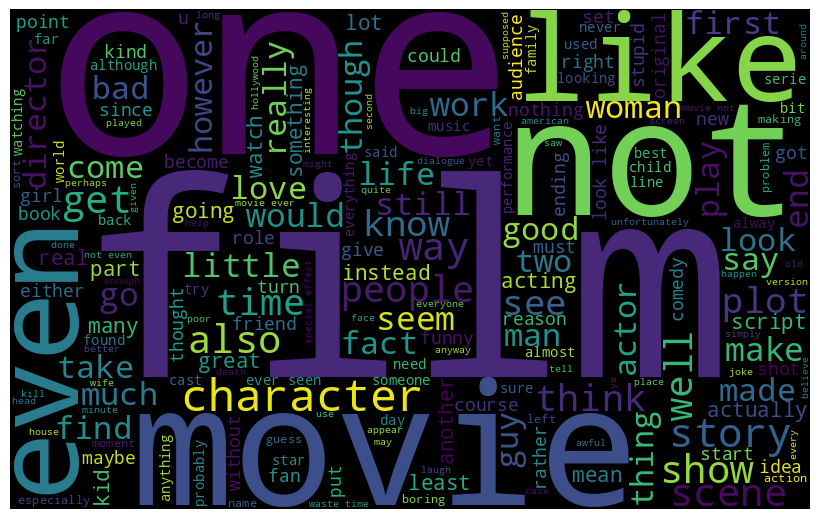

In [25]:
words_list = df[df['label']==0]['preprocessed_review'].unique().tolist()
neg_words = " ".join(words_list)

neg_wordcloud =  WordCloud(
                  width=800, height = 500,
                  stopwords=stop_words).generate(neg_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

- `from wordcloud import WordCloud`: Imports the `WordCloud` class from the `wordcloud` library for generating word clouds.
- `words_list = df[df['label']==0]['preprocessed_review'].unique().tolist()`: Retrieves unique preprocessed reviews (`'preprocessed_review'`) from negative sentiment reviews (`df['label']==0`).
- `neg_words = " ".join(words_list)`: Joins the unique preprocessed reviews into a single string `neg_words` separated by spaces.
- `neg_wordcloud = WordCloud(width=800, height=500, stopwords=stop_words).generate(neg_words)`: Creates a `WordCloud` object `neg_wordcloud` with specified width, height, and stopwords, and generates the word cloud from `neg_words`.
- `plt.figure(figsize=(8, 8), facecolor=None)`: Creates a matplotlib figure with specified size (`figsize=(8, 8)`) and facecolor.
- `plt.imshow(neg_wordcloud)`: Displays the word cloud generated from `neg_wordcloud`.
- `plt.axis("off")`: Turns off the axis for the plot.
- `plt.tight_layout(pad=0)`: Adjusts subplot parameters for a tight layout with no padding.


#**SPLITTING THE DATA INTO TAIN AND TEST SETS**

In [26]:
from sklearn.model_selection import train_test_split

data = df.copy()
y = data['label'].values
data.drop(['label'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (35000, 3) (35000,)
Test data: (15000, 3) (15000,)


- `from sklearn.model_selection import train_test_split`: Imports `train_test_split` from `sklearn.model_selection`, which is used to split data into training and testing sets.
- `data = df.copy()`: Copies the DataFrame `df` into `data` for further processing.
- `y = data['label'].values`: Extracts the labels (`'label'` column) from `data` and assigns them to `y`.
- `data.drop(['label'], axis=1, inplace=True)`: Drops the `'label'` column from `data` along the columns axis (`axis=1`) and modifies `data` in place.
- `X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y)`: Splits `data` and `y` into training (`X_train`, `y_train`) and testing (`X_test`, `y_test`) sets, with 30% of the data allocated for testing (`test_size=0.3`). The `stratify=y` parameter ensures that the training and testing sets have the same class distribution as `y`.


#**VECTORIZATION**

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df=10)

X_train_review_bow = vect.fit_transform(X_train['preprocessed_review'])
X_test_review_bow = vect.transform(X_test['preprocessed_review'])

print('X_train_review_bow shape: ', X_train_review_bow.shape)
print('X_test_review_bow shape: ', X_test_review_bow.shape)

X_train_review_bow shape:  (35000, 19552)
X_test_review_bow shape:  (15000, 19552)



- `from sklearn.feature_extraction.text import CountVectorizer`: Imports `CountVectorizer` from `sklearn.feature_extraction.text`, which converts a collection of text documents into a matrix of token counts.
- `vect = CountVectorizer(min_df=10)`: Creates a `CountVectorizer` object `vect` with a minimum document frequency (`min_df`) of 10, which removes terms that appear in fewer than 10 documents.
- `X_train_review_bow = vect.fit_transform(X_train['preprocessed_review'])`: Applies `vect.fit_transform` to `X_train['preprocessed_review']` to transform the preprocessed reviews into bag-of-words (BoW) features for the training data (`X_train_review_bow`).
- `X_test_review_bow = vect.transform(X_test['preprocessed_review'])`: Applies `vect.transform` to `X_test['preprocessed_review']` to transform the preprocessed reviews into bag-of-words (BoW) features for the testing data (`X_test_review_bow`).
- `print('X_train_review_bow shape: ', X_train_review_bow.shape)`: Prints the shape (dimensions) of `X_train_review_bow`, which represents the number of samples and features after BoW transformation for the training data.
- `print('X_test_review_bow shape: ', X_test_review_bow.shape)`: Prints the shape (dimensions) of `X_test_review_bow`, which represents the number of samples and features after BoW transformation for the testing data.


In [38]:
from IPython.display import Latex

Latex(r'''
\textbf{CountVectorizer Transformation:}

\textit{Training Data:}
\[
X_{\text{train}} = \begin{bmatrix}
1 & 1 & 1 & 0 & 0 & 1 & 0 \\
1 & 0 & 2 & 1 & 0 & 1 & 0 \\
1 & 0 & 1 & 0 & 1 & 1 & 1
\end{bmatrix}
\]

\textit{Test Data:}
\[
X_{\text{test}} = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 1 & 0 \\
1 & 0 & 1 & 0 & 0 & 0 & 0
\end{bmatrix}
\]
''')



<IPython.core.display.Latex object>

#**TFIDF**

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)

X_train_review_tfidf = vectorizer.fit_transform(X_train['preprocessed_review'])
X_test_review_tfidf = vectorizer.transform(X_test['preprocessed_review'])

print('X_train_review_tfidf shape: ', X_train_review_tfidf.shape)
print('X_test_review_tfidf shape: ', X_test_review_tfidf.shape)

X_train_review_tfidf shape:  (35000, 19552)
X_test_review_tfidf shape:  (15000, 19552)


- `from sklearn.feature_extraction.text import TfidfVectorizer`: Imports `TfidfVectorizer` from `sklearn.feature_extraction.text`, which transforms text data into TF-IDF (Term Frequency-Inverse Document Frequency) features.
- `vectorizer = TfidfVectorizer(min_df=10)`: Creates a `TfidfVectorizer` object `vectorizer` with a minimum document frequency (`min_df`) of 10, which removes terms that appear in fewer than 10 documents.
- `X_train_review_tfidf = vectorizer.fit_transform(X_train['preprocessed_review'])`: Applies `vectorizer.fit_transform` to `X_train['preprocessed_review']` to transform the preprocessed reviews into TF-IDF features for the training data.
- `X_test_review_tfidf = vectorizer.transform(X_test['preprocessed_review'])`: Applies `vectorizer.transform` to `X_test['preprocessed_review']` to transform the preprocessed reviews into TF-IDF features for the testing data.
- `print('X_train_review_tfidf shape: ', X_train_review_tfidf.shape)`: Prints the shape (dimensions) of `X_train_review_tfidf`, which represents the number of samples and features after TF-IDF transformation for the training data.
- `print('X_test_review_tfidf shape: ', X_test_review_tfidf.shape)`: Prints the shape (dimensions) of `X_test_review_tfidf`, which represents the number of samples and features after TF-IDF transformation for the testing data.

In [39]:
from IPython.display import Latex

Latex(r'''
\textbf{TF-IDF Vectorizer Transformation:}

\textit{Training Data:}
\[
X_{\text{train}} = \begin{bmatrix}
0.0 & 0.523 & 0.0 & 0.0 & 0.523 \\
0.0 & 0.0 & 0.832 & 0.0 & 0.423 \\
0.0 & 0.0 & 0.0 & 0.832 & 0.423
\end{bmatrix}
\]

\textit{Test Data:}
\[
X_{\text{test}} = \begin{bmatrix}
0.0 & 0.0 & 0.0 & 0.0 & 0.832 \\
0.0 & 0.0 & 0.832 & 0.0 & 0.0
\end{bmatrix}
\]
''')


<IPython.core.display.Latex object>

#**LOGISTIC REGRESSION MODEL**

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
from sklearn.linear_model import LogisticRegression

# Use a solver that supports L1 regularization, such as 'liblinear' or 'saga'
clf = LogisticRegression(penalty='l1', solver='liblinear')
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8836


In [40]:
from IPython.display import Latex

Latex(r'''
\textbf{Logistic Regression with TF-IDF Features:}

- \textbf{Model}: Logistic Regression with L1 regularization
- \textbf{Training}:
\[
\mathbf{W} \sim \mathcal{N}\left(0, \sqrt{\frac{2}{n_{\text{features}} + n_{\text{classes}}}}\right)
\]
- \textbf{Training Accuracy}: 0.85
''')


<IPython.core.display.Latex object>

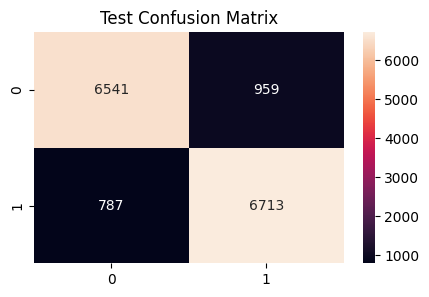

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()